#### This problem shows the implementation of Simple Linear Regression algorithm

" Need to predict the Chance of Admission based on different exam scores"

In [1]:
#Importing the necessory Libraries for data visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
#Lets see the summary of the above data set
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.500000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,485.0,316.558763,11.274704,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,490.0,107.187755,6.112899,92.00,103.0000,107.00,112.00,120.00
University Rating,485.0,3.121649,1.146160,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.374000,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.484000,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.576440,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.560000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.721740,0.141140,0.34,0.6300,0.72,0.82,0.97


In [4]:
#To check data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
#From the above data we see that GRE score,TOEFL score and University rating have some missing values
data.isnull().sum()
# We will impute the missing values later in this Notebook

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

In [7]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
# Lets visualise data
# The first cloumn is just serial numbers, so we don' need that column. Let's drop it from data and make it more clean
#data = data.drop(['Serial No.'],axis=1)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


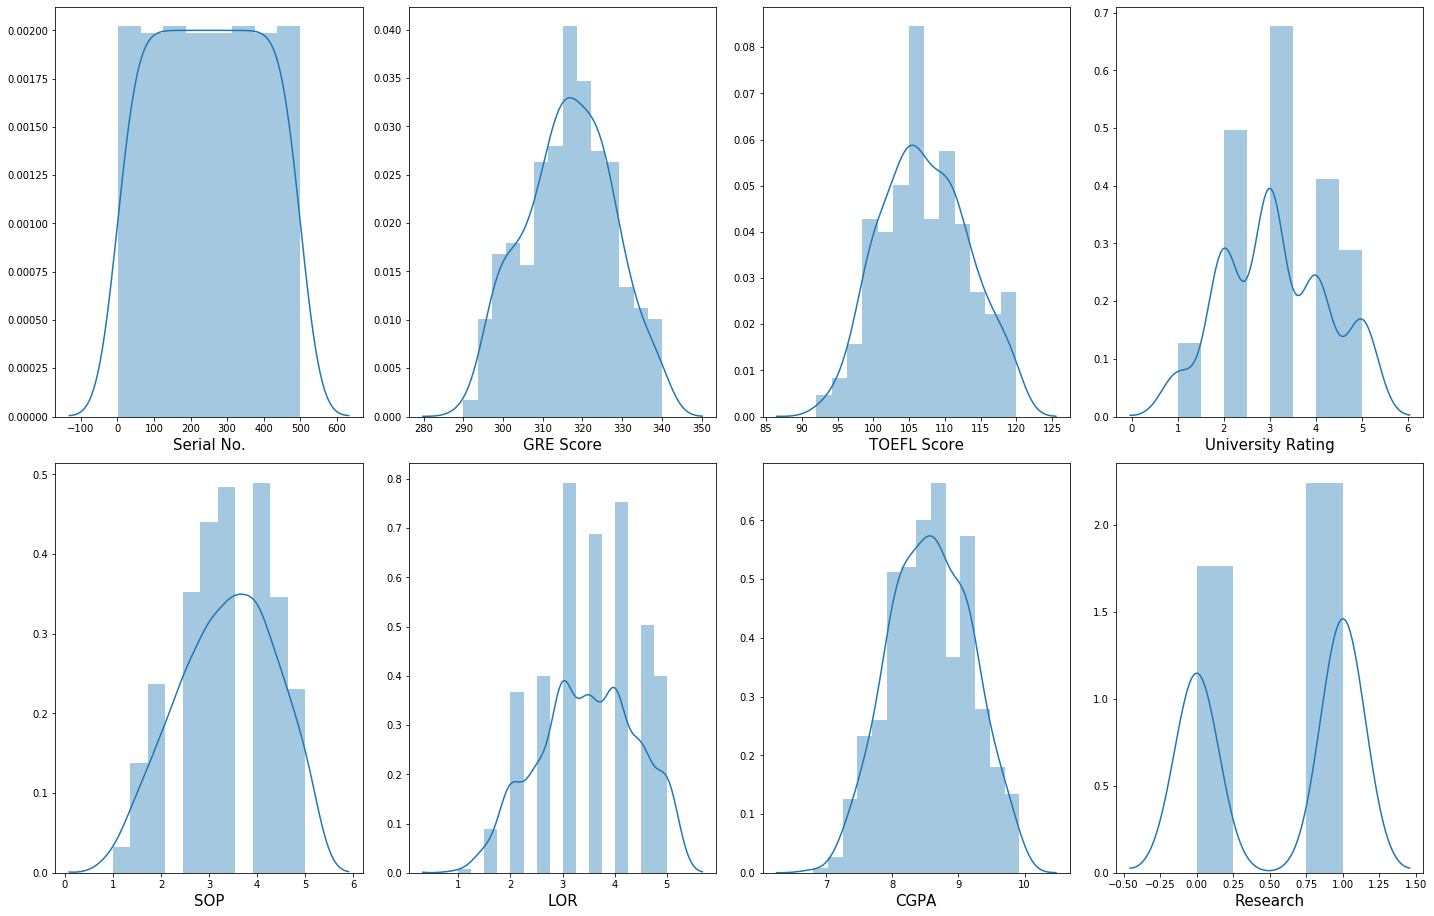

In [9]:
#let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnum = 1

for column in data:
    if plotnum < 9:
        ax = plt.subplot(4,4,plotnum)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 15)
    plotnum +=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.


In [39]:
y = data['Chance of Admit']
#X = data.drop(['Chance of Admit'],axis = 1)
#X = data.drop(['Serial No.'],axis = 1)
X = data.drop(['Chance of Admit','Serial No.'],axis = 1)

In [40]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


In [41]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

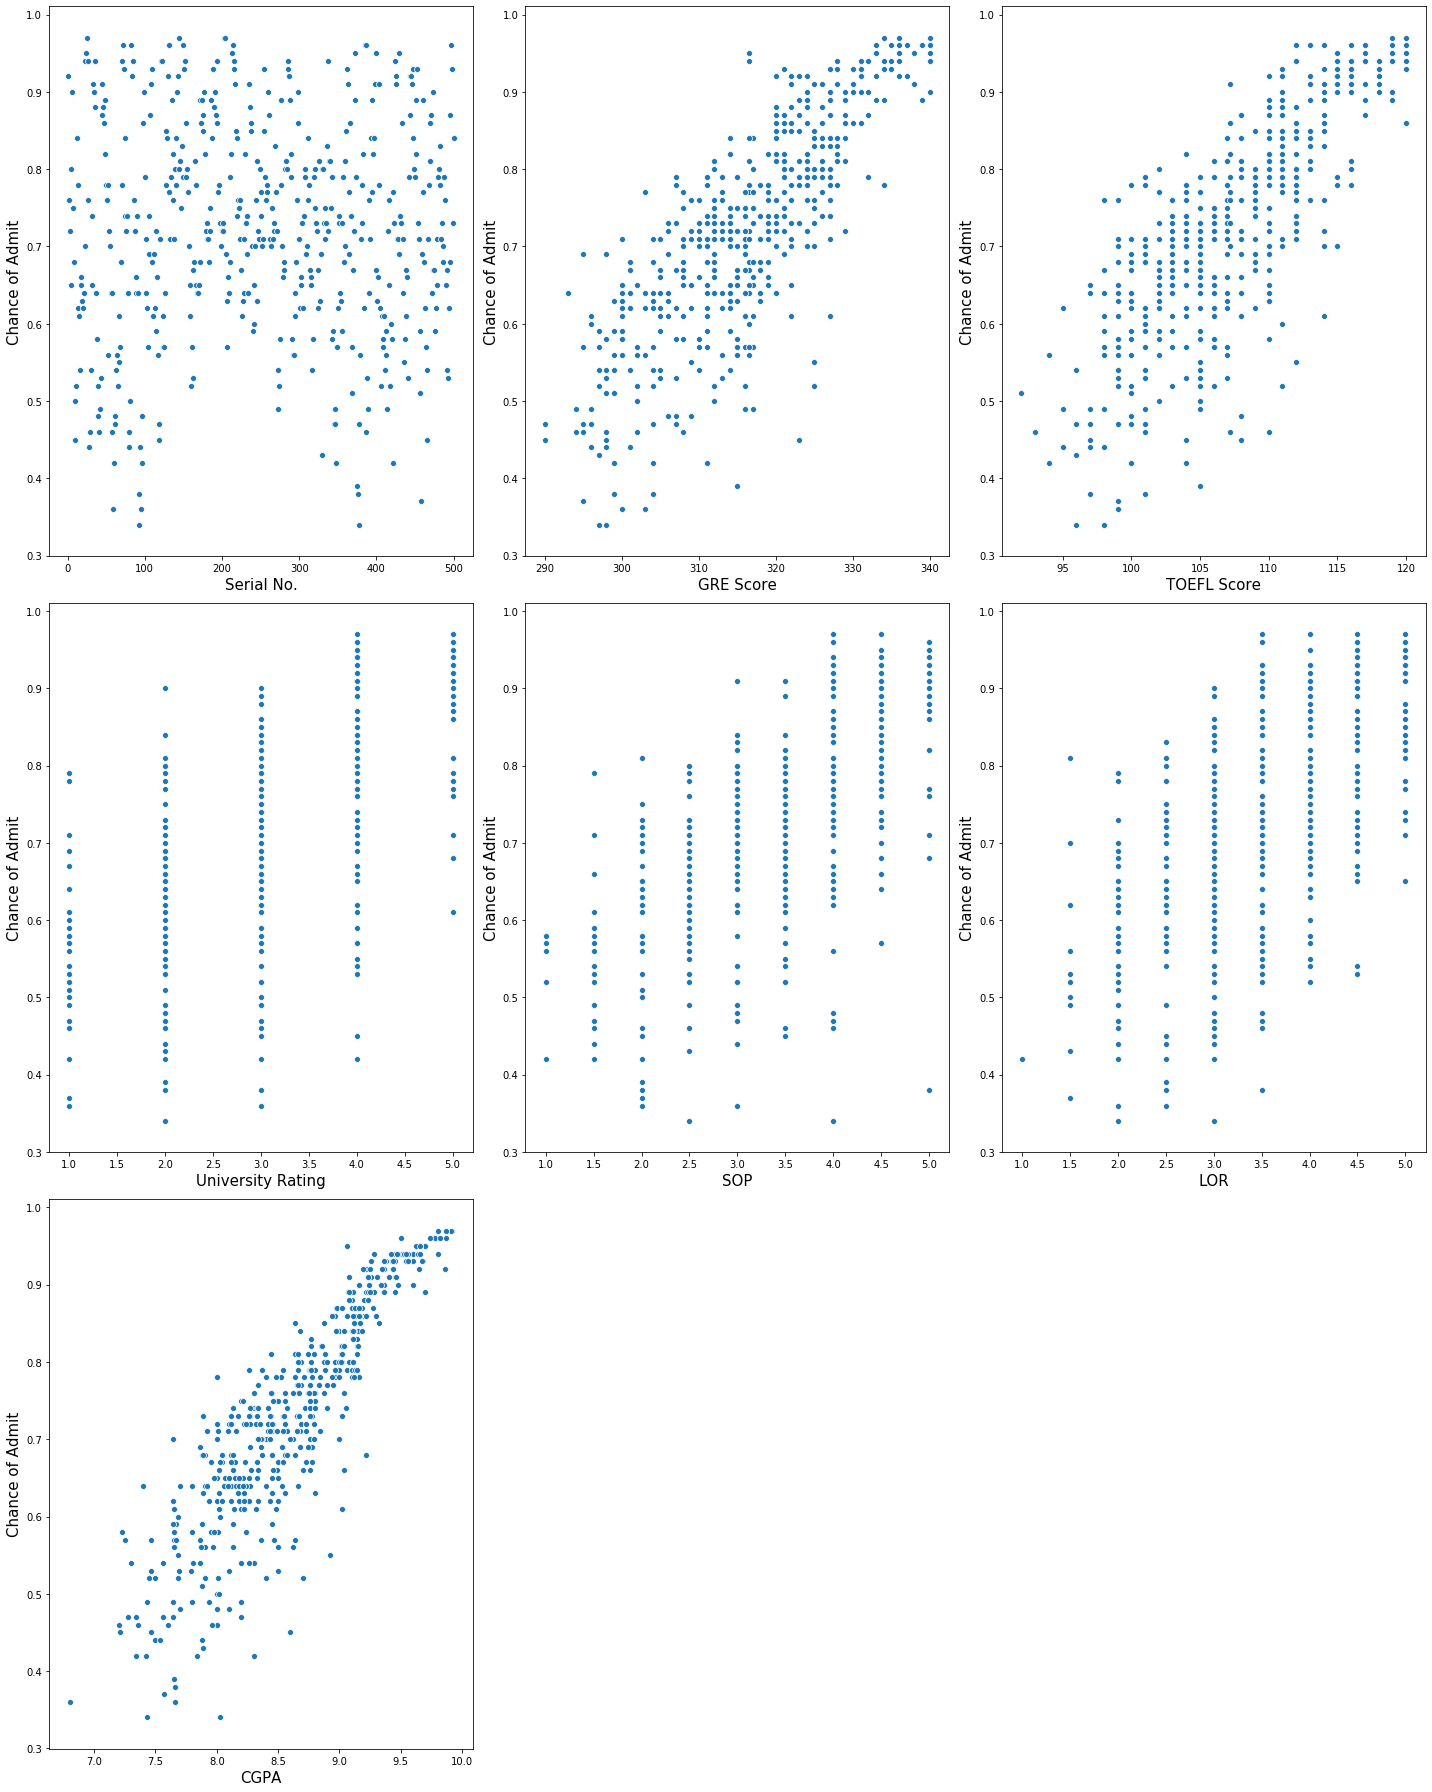

In [13]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum = 1

for column in X:
    if plotnum < 8:
        ax = plt.subplot(3,3,plotnum)
        sns.scatterplot(X[column],y)
        plt.xlabel(column,fontsize = 15)
        plt.ylabel('Chance of Admit',fontsize = 15)
    plotnum +=1
plt.tight_layout()

In [42]:
#now scale the data using the standard scalar object
#Again import sum import Libraries for Linear regression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
scalar = StandardScaler()

X_scaled = scalar.fit_transform(X)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables,i) for i in range (variables.shape[1])]
vif['Features'] = X.columns

In [45]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go. 

Great. Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
import pickle

In [48]:
# saving the model to the local file system
filename = 'Finalized_Linear_Regression_model.pickle'
pickle.dump(regression,open(filename,'wb'))

In [50]:
# prediction using the saved model
saved_model = pickle.load(open(filename,'rb'))
pred_out = saved_model.predict(scalar.transform([[300,110,5,5,5,10,1]]))
pred_out

array([0.92190162])

In [51]:
regression.score(X_train,y_train)

0.8415250484247909

In [52]:
regression.score(X_test,y_test)

0.7534898831471066

In [55]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    N = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-((1-r2)*(N-1)/(N-p-1))
    return adjusted_r2

In [56]:
adj_r2(X_train,y_train)

0.8385023654247188

In [57]:
adj_r2(X_test,y_test)

0.7387414146174464

In [58]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV

In [59]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lass = LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lass.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [62]:
lambd = lass.alpha_
lambd

3.0341655445178153e-05

In [66]:
lasso_reg = Lasso(lambd)
lasso_reg.fit(X_train,y_train)
lasso_reg.score(X_test,y_test)

0.7534654960492284

In [67]:
lasso_reg.score(X_train,y_train)

0.841524969566963

In [68]:
alphas = np.random.uniform(low=0,high=10,size=(50,))
ridge = RidgeCV(alphas=alphas,cv=10,normalize=True)
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([0.42268498, 9.26988474, 6.38900936, 7.07143918, 8.89013942,
       4.37969761, 9.33902528, 5.81661855, 0.48322445, 9.86429297,
       9.35166668, 7.19769675, 4.5753304 , 0.59403983, 1.36749269,
       1.4798977 , 4.04657313, 9.83855236, 7.91598342, 8.81148444,
       7.30966556, 5.8484345 , 7.44397954, 5.72661279, 1.23856069,
       8.94305509, 1.69337782, 8.85859176, 8.8802591 , 9.14848273,
       9.80342185, 1.07117494, 4.96609002, 6.07810863, 7.84127671,
       4.7481465 , 6.48581293, 7.01317761, 6.77543674, 4.13021683,
       4.44319769, 5.16286936, 6.09945796, 2.44915994, 3.46179045,
       5.82355522, 5.49326391, 6.54365823, 1.52406706, 5.22546477]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [69]:
ridge.alpha_

0.42268498192432724

In [71]:
ridge_reg = Ridge(alpha=ridge.alpha_)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.42268498192432724, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
ridge_reg.score(X_test,y_test)

0.7536949277611128